# Mout Google **Drive** 


> To load Dataset  


*   For training
*   For validation
*   For testing 


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# install the Dependencies
!pip install kaggle


In [3]:
from google.colab import files
files.upload()

MessageError: ignored

In [9]:
!mkdir.kaggle

/bin/bash: mkdir.kaggle: command not found


In [10]:
import json
token = {"username":"javaidahmad","key":"9fe784657d02977dbcae74d0ca3ea932"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

FileNotFoundError: ignored

In [11]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [12]:
import os
os.environ['KAGGLE_USERNAME'] = "javaidahmad" # username from the json file
os.environ['KAGGLE_KEY'] = "9fe784657d02977dbcae74d0ca3ea932" # key from the json file
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset # api copied from kaggle

100% 2.70G/2.70G [00:41<00:00, 42.8MB/s]
100% 2.70G/2.70G [00:42<00:00, 68.9MB/s]


In [14]:
import os
os.environ['KAGGLE_USERNAME'] = "javaidahmad" # username from the json file
os.environ['KAGGLE_KEY'] = "9fe784657d02977dbcae74d0ca3ea932" # key from the json file
!kaggle datasets download -d javaidahmad/test-new-plant-disease-dataset # api copied from kaggle

!ls



 37% 5.00M/13.6M [00:00<00:00, 48.0MB/s]
100% 13.6M/13.6M [00:00<00:00, 66.9MB/s]
kaggle.json			sample_data
new-plant-diseases-dataset.zip	test-new-plant-disease-dataset.zip


In [18]:
!unzip -q test-new-plant-disease-dataset.zip -d .

replace ./test 38/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112_270deg.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [17]:
!unzip -q new-plant-diseases-dataset.zip -d .

replace ./New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# ***Install  prequest packages***

In [19]:
import numpy as np
import tensorflow as tf
from pathlib import Path
from keras import  backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense , Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
%matplotlib inline

print("Pacakages added ")

Using TensorFlow backend.


Pacakages added 


## **Path of Dataset for training , validation and testing**

In [20]:
train_path = Path('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train')
test_path =  Path('/content/test 38')
valid_path = Path('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid')
print(train_path)
print(valid_path)
print(test_path)

/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
/content/test 38


In [21]:
batch_size = 128

train_batches = ImageDataGenerator().flow_from_directory(train_path,
                                                         target_size=(224,224), classes=['Apple___Apple_scab','Apple___Black_rot', 'Apple___Cedar_apple_rust',
                                                        'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy',
                                                        'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                                                        'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight',
                                                        'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy',
                                                        'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)',
                                                        'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
                                                        'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy',
                                                        'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch',
                                                        'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight',
                                                        'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
                                                        'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=batch_size)


test_batches =  ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224), classes=['Apple___Apple_scab','Apple___Black_rot', 'Apple___Cedar_apple_rust',
                                                        'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy',
                                                        'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                                                        'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight',
                                                        'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy',
                                                        'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)',
                                                        'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
                                                        'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy',
                                                        'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch',
                                                        'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight',
                                                        'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
                                                        'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=2)


valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224), classes=['Apple___Apple_scab','Apple___Black_rot', 'Apple___Cedar_apple_rust',
                                                        'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy',
                                                        'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                                                        'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight',
                                                        'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy',
                                                        'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)',
                                                        'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
                                                        'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy',
                                                        'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch',
                                                        'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight',
                                                        'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
                                                        'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=batch_size)

Found 70295 images belonging to 38 classes.
Found 866 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [22]:
class_dict = train_batches.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___healthy': 5, 'Cherry_(including_sour)___Powdery_mildew': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___healthy': 9, 'Corn_(maize)___Northern_Leaf_Blight': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___healthy': 13, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___healthy': 21, 'Potato___Late_blight': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___healthy': 26, 'Strawberry___Leaf_scorch': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___healthy': 30, 'Tomato___L

# Loading vgg16 model

In [23]:
import keras 
model = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

print(" vgg16-model")

553467904/553467096 [==============================] - 6s 0us/step
 vgg16-model


In [24]:
model.summary()
print("\n \n \n \n \n summary of  model")

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [25]:

vgg16_model = Sequential()
for layer in model.layers[:-1]:
    vgg16_model.add(layer)
print(' model copied')

 model copied


In [26]:
vgg16_model.summary()
print("\n \n \n \n \n summary of  model")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [27]:

for layer in vgg16_model.layers:
    layer.trainable = False

In [28]:
vgg16_model.summary()
print('\n \n sscd')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [29]:
vgg16_model.add(Dense(38, activation = 'softmax'))
print('add last layer')

add last layer


In [30]:
vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

# Compile a model

In [31]:

vgg16_model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=["accuracy"])
print('checked')

checked


In [32]:
train_num = train_batches.samples
valid_num = valid_batches.samples

# ***Checkpoint to save the best accuracy ***

In [33]:

# checkpoint
from keras.callbacks import ModelCheckpoint
weightpath = "vgg16.hdf5"
checkpoint = ModelCheckpoint(weightpath, monitor='val_accuracy ', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callbacks_list = [checkpoint]

# ***model is learning (Training)***

In [34]:

hist = vgg16_model.fit_generator(train_batches, steps_per_epoch=train_num//batch_size,
                    validation_data = valid_batches, validation_steps=valid_num//batch_size,
                    epochs = 30 ,callbacks=callbacks_list, verbose=1)

Epoch 1/30
549/549 [==============================] - 825s 2s/step - loss: 1.0282 - accuracy: 0.7301 - val_loss: 0.5150 - val_accuracy: 0.8681
Epoch 2/30


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy  available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


549/549 [==============================] - 810s 1s/step - loss: 0.3752 - accuracy: 0.8950 - val_loss: 0.4471 - val_accuracy: 0.9025
Epoch 3/30
549/549 [==============================] - 807s 1s/step - loss: 0.2801 - accuracy: 0.9202 - val_loss: 0.3595 - val_accuracy: 0.9159
Epoch 4/30
549/549 [==============================] - 806s 1s/step - loss: 0.2295 - accuracy: 0.9346 - val_loss: 0.2017 - val_accuracy: 0.9253
Epoch 5/30
549/549 [==============================] - 807s 1s/step - loss: 0.1986 - accuracy: 0.9430 - val_loss: 0.1660 - val_accuracy: 0.9301
Epoch 6/30
549/549 [==============================] - 806s 1s/step - loss: 0.1744 - accuracy: 0.9506 - val_loss: 0.2991 - val_accuracy: 0.9350
Epoch 7/30
549/549 [==============================] - 807s 1s/step - loss: 0.1558 - accuracy: 0.9558 - val_loss: 0.1478 - val_accuracy: 0.9375
Epoch 8/30
549/549 [==============================] - 806s 1s/step - loss: 0.1406 - accuracy: 0.9605 - val_loss: 0.1412 - val_accuracy: 0.9425
Epoch 9/30

In [35]:
!pwd
!ls

/content
 kaggle.json				  sample_data
'new plant diseases dataset(augmented)'   test
'New Plant Diseases Dataset(Augmented)'  'test 38'
 new-plant-diseases-dataset.zip		  test-new-plant-disease-dataset.zip


In [36]:
vgg16_model.get_weights()

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [37]:

mohdel_save_name = '/content/drive/My Drive/Plant Disease Detection and Classification ( Final year project )/vgg16-classifier.pt'
path = F"/content/Plant Disease Detection  and Classification  -  Final year project" 
vgg16_model.save( path)
print('model saved at' + path )


model saved at/content/Plant Disease Detection  and Classification  -  Final year project


## ***Save model ***

In [38]:
vgg16_model.save('/content/drive/My Drive/Plant Disease Detection and Classification ( Final year project )/vgg16-classifier2.h5')
 
print('model saved with name vgg16-classifier2.h5  at'  )
!pwd

OSError: ignored

# ***Loard the saved model***

In [ ]:
# from keras.models import load_model

# vgg16_model = load_model("/content/drive/My Drive/Plant Disease Detection and Classification ( Final year project )/vgg16-classifier1.h5")

# **Accuracy of Fine-tuned vgg16 model**

# Visualising Training Progress

In [4]:
#plotting training values

# hist = vgg16_model
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()


 #plot 2 graphs check code

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss1 = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss1, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

NameError: ignored

# ***Performance of the Model***

In [ ]:
accuracy = np.array(acc)
print('Training accuracy of fine-tuned vgg16  model is     :   '  , accuracy[-1] )
val_accuracy = np.array(val_acc)
print('Validation  accuracy of fine-tuned vgg16  model is  :   ' , val_accuracy[-1])

t_loss = np.array(loss)
print('training   loss of fine-tuned vgg16  model   is     :   ' , t_loss[-1])
val_loss = np.array(val_loss1)
print('Validation  loss of fine-tuned vgg16  model  is     :   ' , val_loss[-1])


#  Model Accuracy



In [ ]:
accuracy = np.array(acc)
print('Accuracy of model is      :   '  , accuracy[-1]*100,'%' )

# To do predictions on the trained model I need to load the best saved model and pre-process the image and pass the image to the model for output

In [ ]:
# # predicting an image
# from keras.preprocessing import image
# import numpy as np
# image_path = "/content/drive/My Drive/Colab Notebooks/test/AppleScab2.JPG"
# new_img = image.load_img(image_path, target_size=(224, 224))
# img = image.img_to_array(new_img)
# img = np.expand_dims(img, axis=0)
# img = img/255

# print("Following is our prediction:")
# prediction = classifier.predict(img)
# # decode the results into a list of tuples (class, description, probability)
# # (one such list for each sample in the batch)
# d = prediction.flatten()
# j = d.max()
# for index,item in enumerate(d):
#     if item == j:
#         class_name = li[index]

# ##Another way
# # img_class = classifier.predict_classes(img)
# # img_prob = classifier.predict_proba(img)
# # print(img_class ,img_prob )


# #ploting image with predicted class name        
# plt.figure(figsize = (4,4))
# plt.imshow(new_img)
# plt.axis('off')
# plt.title(class_name)
# plt.show()

# test set

In [ ]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,20), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=20)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
print('checked')

checked


In [ ]:
imgs,test_labels = next(test_batches)
print('checked')

checked


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


checked


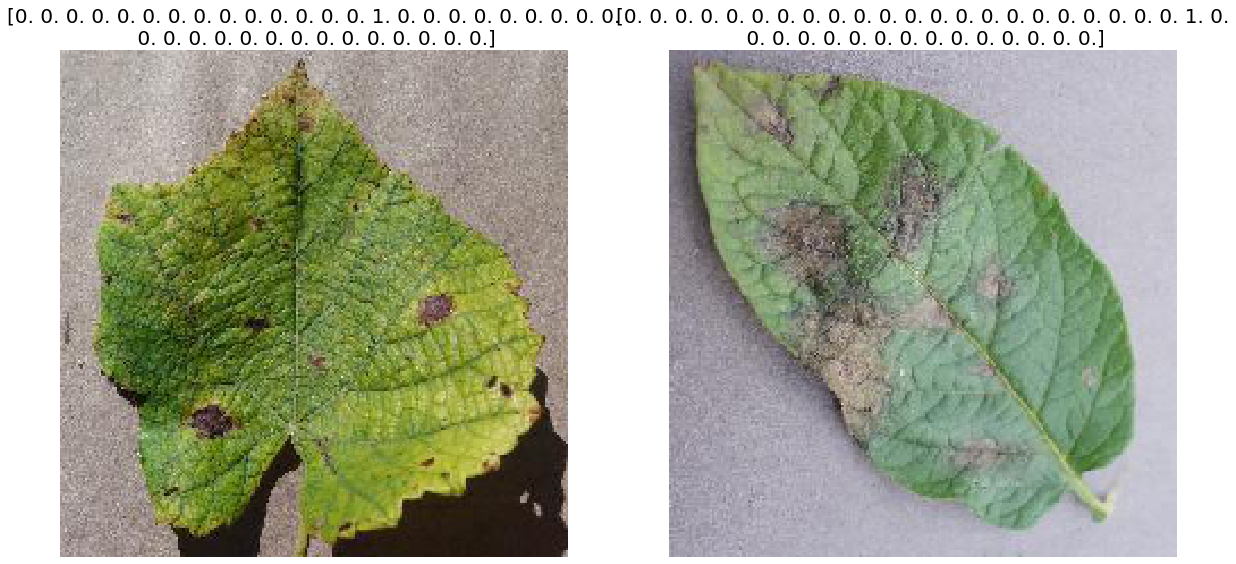

In [ ]:
# this is actually encording
plots(imgs,titles = test_labels)
print('checked')

In [ ]:
test_labels = test_labels[:,0]
test_labels
# print(imgs, result[:,0])

array([0., 0.], dtype=float32)

# #Preductions

In [ ]:
predictions = vgg16_model.predict_generator(test_batches,steps=1,verbose=0)

In [ ]:
predictions

array([[3.3880406e-05, 4.4746665e-07, 1.4323248e-06, 1.2767028e-06,
        3.8750496e-11, 1.8034676e-08, 1.0910278e-06, 2.5525015e-08,
        4.7494563e-08, 3.8388411e-11, 1.5278859e-07, 6.6379136e-03,
        4.4319448e-03, 9.3785338e-06, 9.7748864e-01, 2.9895625e-10,
        2.3943819e-06, 2.6238320e-10, 3.9154557e-07, 1.3375048e-10,
        8.8148636e-06, 1.8481109e-07, 1.6000697e-06, 1.1909865e-06,
        6.2241618e-08, 3.7428710e-04, 2.5636635e-07, 5.0573598e-04,
        2.7192262e-04, 1.0958028e-03, 1.0082481e-04, 1.1588180e-05,
        1.3432426e-05, 6.5980167e-03, 8.3785217e-06, 2.3979952e-03,
        8.1755212e-07, 7.1760283e-08],
       [1.6812250e-05, 2.1144942e-07, 9.4597104e-05, 1.5536464e-06,
        8.6708424e-06, 4.9437752e-09, 4.0683206e-04, 2.8089536e-07,
        1.1007760e-10, 2.5464409e-08, 9.2919578e-08, 2.6348513e-08,
        1.9987941e-07, 2.3300074e-06, 3.1550397e-07, 1.4705260e-07,
        1.5987637e-09, 5.1394944e-10, 5.4849880e-07, 5.9668248e-05,
        5

# ** code of confusion matrix**

In [ ]:
cm = confusion_matrix(test_labels,predictions[:,0])

ValueError: ignored

In [ ]:



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
  
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

ValueError: ignored

# *** confusion of test data***

In [ ]:
cm_plot_labels = ['healthy_leave','unhealthy_leave']
plot_confusion_matrix(cm,cm_plot_labels , title = 'confusion matrix' )

NameError: ignored

# test set

In [ ]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,20), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=20)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
print('checked')

checked


In [ ]:
imgs,test_labels = next(test_batches)
print('checked')

checked


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


checked


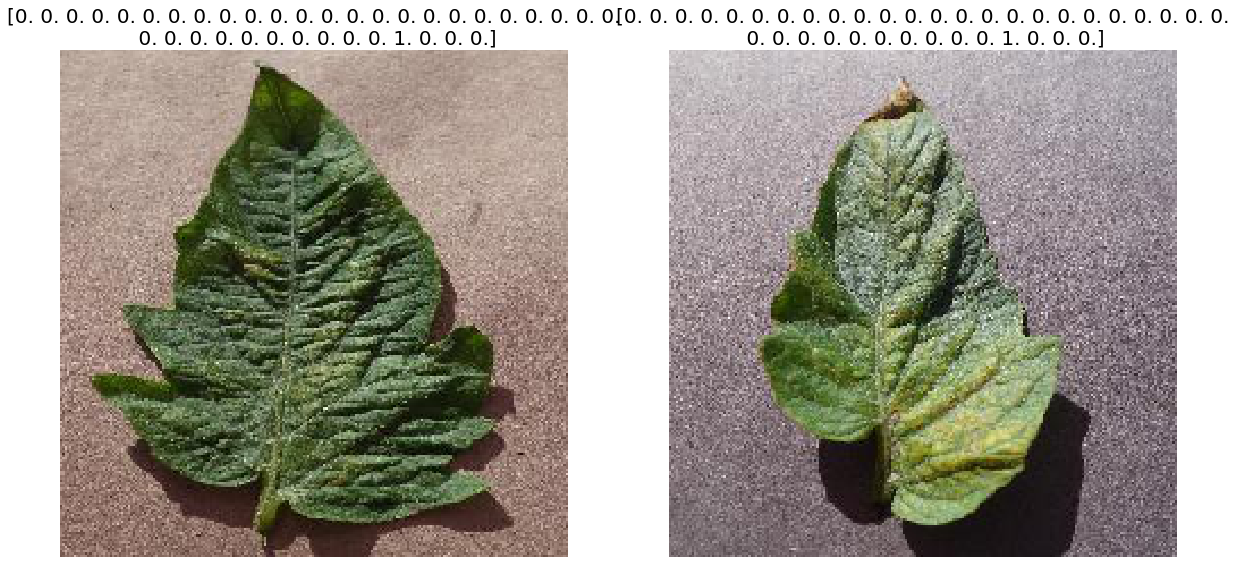

In [ ]:
# this is actually encording
plots(imgs,titles = test_labels)
print('checked')

In [ ]:
test_labels = test_labels[:,0]
test_labels
# print(imgs, result[:,0])

array([0., 0.], dtype=float32)

In [ ]:
est_batches =  ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224), classes=['Apple___Apple_scab','Apple___Black_rot', 'Apple___Cedar_apple_rust',
                                                        'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy',
                                                        'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
                                                        'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight',
                                                        'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy',
                                                        'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)',
                                                        'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
                                                        'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy',
                                                        'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch',
                                                        'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight',
                                                        'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',
                                                        'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'], batch_size=20)

Found 866 images belonging to 38 classes.


# #Preductions

In [ ]:
predictions = vgg19_model.predict_generator(test_batches,steps=1,verbose=0)

In [ ]:
predictions

array([[5.39689508e-11, 5.77272995e-12, 2.51429311e-11, 7.17182286e-11,
        1.02659097e-11, 5.86112647e-14, 4.93399410e-09, 2.13445546e-11,
        2.20413656e-17, 7.16671103e-18, 1.39903390e-14, 4.07352790e-10,
        1.81596548e-07, 1.84261769e-15, 3.98790063e-11, 4.62841085e-11,
        6.00981125e-13, 9.36851847e-14, 2.00078198e-09, 2.27045471e-09,
        3.15053375e-15, 5.44074386e-09, 4.81000342e-08, 2.07077688e-09,
        6.07015469e-13, 8.32036483e-15, 2.42299162e-14, 2.53694120e-13,
        1.89212233e-06, 2.98765481e-05, 1.77039288e-03, 6.59481020e-06,
        1.13143164e-04, 1.00277521e-06, 9.76377070e-01, 5.42851351e-03,
        1.46425532e-06, 1.62697285e-02],
       [3.71597189e-08, 5.66844965e-12, 1.24871391e-07, 1.68650178e-08,
        2.88292359e-11, 1.11993765e-15, 3.36875222e-10, 1.72344111e-10,
        1.59721435e-15, 1.10776864e-15, 9.99781147e-10, 3.71578913e-11,
        4.08720524e-07, 3.53454180e-12, 1.43164115e-07, 9.00603512e-14,
        2.47044198e-08,

# **Calculate and plot confusion matrix:**

In [ ]:
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes, figname, normalize=False,
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')
  plt.figure(figsize=(8,8))
  plt.title('Confusion Matrix')
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
    
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()
  plt.savefig(figname)




In [1]:
test_img, test_labells = next(test_batches)

NameError: ignored

In [ ]:
Y_pred = vgg19_model.predict_generator(test_batches)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_batches.classes, y_pred)
plot_confusion_matrix(cm, classes = test_labels , normalize=False, figname = 'Confusion_matrix_concrete.jpg')

NameError: ignored

**Confusion matrix of testing data**

Confusion matrix, without normalization
[[2 0 0 ... 0 2 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 1 1]
 ...
 [0 0 1 ... 0 1 2]
 [0 0 0 ... 1 0 0]
 [0 1 1 ... 0 1 0]]


IndexError: ignored

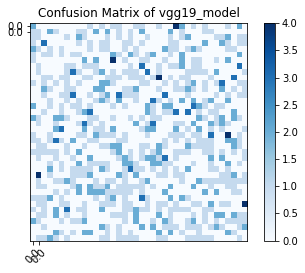

In [ ]:
#Y_pred = model.predict_generator(test_generator)
Y_pred = vgg19_model.predict_generator(test_batches)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_batches.classes, y_pred)
plot_confusion_matrix(cm, classes = test_labels, title='Confusion Matrix of vgg19_model', normalize=False)

In [ ]:



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
  
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# *** confusion of test data***

In [ ]:
# cm_plot_labels = ['healthy_leave','unhealthy_leave']
# plot_confusion_matrix(cm,cm_plot_labels , title = 'confusion matrix' )